In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')
test_df = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')
print(train_df.shape)
print(test_df.shape)
train_df.head()

(1460, 81)
(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
#for col in ['MSZoning', 'HouseStyle', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'Neighborhood', 'Street', 
#           'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
#            'Exterior1st', 'Exterior2nd', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
#            'MasVnrType', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'GarageQual','GarageCond','PavedDrive',
#            'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath' ,'KitchenQual','Functional', 'Fireplaces',
#            'FireplaceQu','GarageType' ,'GarageFinish', 'GarageCars','SaleType', 'SaleCondition']:
#    print(f'uniques names in {col} is : ',train_df[col].nunique())

In [5]:
train_df['Alley'].isnull().sum()

1369

# Fill in missing values

In [6]:
#filling NaN house cosmetics with none
cols_fill_none = ['Alley', 'PoolQC', 'Fence', 'FireplaceQu', 
                  'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                  'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageYrBlt', 'MasVnrType']

for df in [train_df, test_df]:
    for col in cols_fill_none:
        df[col] = df[col].fillna('None')

In [7]:
#fill in null vals < 50 for train
null_val_less_50 = train_df.isnull().sum()
null_val_less_50 = null_val_less_50[null_val_less_50 < 50]

num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = train_df.select_dtypes(include=['object']).columns

for col in null_val_less_50.index:
    if col in num_cols:
        train_df[col] = train_df[col].fillna(train_df[col].mean())
    elif col in cat_cols:
        train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

#fill in null vals < 50 for test
null_val_less_50 = test_df.isnull().sum()
null_val_less_50 = null_val_less_50[null_val_less_50 < 50]

num_cols = test_df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = test_df.select_dtypes(include=['object']).columns

for col in null_val_less_50.index:
    if col in num_cols:
        test_df[col] = test_df[col].fillna(test_df[col].mean())
    elif col in cat_cols:
        test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

#fill in lotfrontage
for df in [train_df, test_df]:
    df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(
        lambda x: x.fillna(x.median())
    )

In [8]:
#---- fix values ----
for df in [train_df, test_df]:
    #garage
    df.loc[df['GarageArea'] == 0,['GarageType','GarageFinish','GarageQual','GarageCond']] = df.loc[df['GarageArea'] == 0,['GarageType','GarageFinish','GarageQual','GarageCond']].fillna('None')
    df.loc[df['GarageArea'] > 0, 'GarageYrBlt'] = df.loc[df['GarageArea'] > 0, 'GarageYrBlt'].fillna(df['YearBuilt'])
    #basement
    df.loc[df['TotalBsmtSF'] == 0, ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']] = df.loc[df['TotalBsmtSF'] == 0, ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].fillna('None')
    #fireplace
    df.loc[df['Fireplaces'] == 0, 'FireplaceQu'] = df.loc[df['Fireplaces'] == 0, 'FireplaceQu'].fillna('None')
    #pool
    df.loc[df['PoolArea'] == 0, 'PoolQC'] = df.loc[df['PoolArea'] == 0, 'PoolQC'].fillna('None')
    #masonry
    df.loc[df['MasVnrArea'] == 0, 'MasVnrType'] = df.loc[df['MasVnrArea'] == 0, 'MasVnrType'].fillna('None')
    df.loc[df['MasVnrType'] == 'None', 'MasVnrArea'] = df.loc[df['MasVnrType'] == 'None', 'MasVnrArea'].fillna(0)

/tmp/ipykernel_13/2373385668.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[df['GarageArea'] > 0, 'GarageYrBlt'] = df.loc[df['GarageArea'] > 0, 'GarageYrBlt'].fillna(df['YearBuilt'])


In [9]:
quality_map = {
    "Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1
}

quality_cols = [
    "ExterQual", "ExterCond", "BsmtQual", "BsmtCond",
    "KitchenQual", "HeatingQC", "GarageQual", "GarageCond", "PoolQC"
]

for df in [train_df, test_df]:
    for col in quality_cols:
        if col in df.columns:
            df[col] = df[col].map(quality_map).fillna(0)

In [10]:
#---- group ----
# Interior
train_df["overall_interior_quality"] = train_df[["OverallQual", "OverallCond", "KitchenQual", "HeatingQC"]].mean(axis=1)
test_df["overall_interior_quality"] = test_df[["OverallQual", "OverallCond", "KitchenQual", "HeatingQC"]].mean(axis=1)

# Exterior
train_df["overall_exterior_quality"] = train_df[["ExterQual", "ExterCond"]].mean(axis=1)
test_df["overall_exterior_quality"] = test_df[["ExterQual", "ExterCond"]].mean(axis=1)

# Basement
train_df["overall_basement_quality"] = train_df[["BsmtQual", "BsmtCond"]].mean(axis=1)
test_df["overall_basement_quality"] = test_df[["BsmtQual", "BsmtCond"]].mean(axis=1)

# Garage
train_df["garage_overall"] = train_df[["GarageQual", "GarageCond"]].mean(axis=1)
test_df["garage_overall"] = test_df[["GarageQual", "GarageCond"]].mean(axis=1)

# Outdoor
train_df["overall_outdoor_quality"] = train_df[["WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea"]].sum(axis=1)
test_df["overall_outdoor_quality"] = test_df[["WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea"]].sum(axis=1)

# House ages
train_df["house_age"] = train_df["YrSold"] - train_df["YearBuilt"]
train_df["remodel_age"] = train_df["YrSold"] - train_df["YearRemodAdd"]

test_df["house_age"] = test_df["YrSold"] - test_df["YearBuilt"]
test_df["remodel_age"] = test_df["YrSold"] - test_df["YearRemodAdd"]

# Feature Engineering

In [11]:
#Total floor area
train_df["total_floor_sf"] = train_df["1stFlrSF"] + train_df["2ndFlrSF"]
test_df["total_floor_sf"] = test_df["1stFlrSF"] + test_df["2ndFlrSF"]

#Total porch area 
train_df["total_porch_sf"] = train_df["OpenPorchSF"] + train_df["EnclosedPorch"] + train_df["3SsnPorch"] + train_df["ScreenPorch"]
test_df["total_porch_sf"] = test_df["OpenPorchSF"] + test_df["EnclosedPorch"] + test_df["3SsnPorch"] + test_df["ScreenPorch"]

#Total bathrooms 
train_df["total_bathrooms"] = train_df["FullBath"] + (0.5 * train_df["HalfBath"]) + train_df["BsmtFullBath"] + (0.5 * train_df["BsmtHalfBath"])
test_df["total_bathrooms"] = test_df["FullBath"] + (0.5 * test_df["HalfBath"]) + test_df["BsmtFullBath"] + (0.5 * test_df["BsmtHalfBath"])

#Total square foot
train_df["total_sf"] = train_df["GrLivArea"] + train_df["TotalBsmtSF"]
test_df["total_sf"] = test_df["GrLivArea"] + test_df["TotalBsmtSF"]

In [12]:
#Quality total living area
train_df["quality_living_sf"] = train_df["GrLivArea"] * train_df["OverallQual"]
test_df["quality_living_sf"] = test_df["GrLivArea"] * test_df["OverallQual"]

#Quality basement
train_df["quality_basement_sf"] = train_df["TotalBsmtSF"] * train_df["overall_basement_quality"]
test_df["quality_basement_sf"] = test_df["TotalBsmtSF"] * test_df["overall_basement_quality"]

#Quality garage
train_df["quality_garage_sf"] = train_df["GarageArea"] * train_df["garage_overall"]
test_df["quality_garage_sf"] = test_df["GarageArea"] * test_df["garage_overall"]

In [13]:
#if home remodeled
train_df["was_remodeled"] = (train_df["YearBuilt"] != train_df["YearRemodAdd"]).astype(int)
test_df["was_remodeled"] = (test_df["YearBuilt"] != test_df["YearRemodAdd"]).astype(int)

# Home condition:age ratio
#train_df["age_condition_ratio"] = train_df["OverallCond"] / (1 + train_df["house_age"])
#test_df["age_condition_ratio"] = test_df["OverallCond"] / (1 + test_df["house_age"])

In [14]:
#Mean neighborhood sale price
neigh_price = train_df.groupby("Neighborhood")["SalePrice"].mean()

train_df["neigh_mean_price"] = train_df["Neighborhood"].map(neigh_price)
test_df["neigh_mean_price"] = test_df["Neighborhood"].map(neigh_price)

In [15]:
#binary features
for df in [train_df, test_df]:
    df["has_pool"] = (df["PoolArea"] > 0).astype(int)
    df["has_garage"] = (df["GarageArea"] > 0).astype(int)
    df["has_basement"] = (df["TotalBsmtSF"] > 0).astype(int)
    df["has_fireplace"] = (df["Fireplaces"] > 0).astype(int)
    df["has_deck"] = (df["WoodDeckSF"] > 0).astype(int)

/tmp/ipykernel_13/2530232856.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["has_fireplace"] = (df["Fireplaces"] > 0).astype(int)
/tmp/ipykernel_13/2530232856.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["has_deck"] = (df["WoodDeckSF"] > 0).astype(int)
/tmp/ipykernel_13/2530232856.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

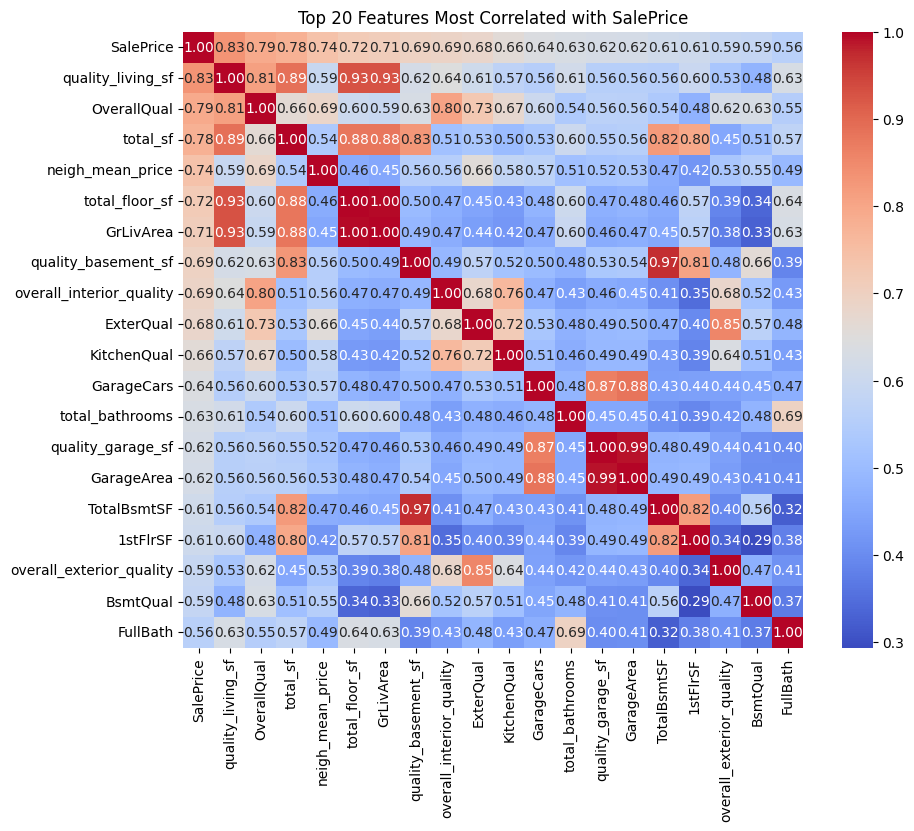

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# pick numeric features only
numeric_df = train_df.select_dtypes(include=['number'])

# correlation matrix
corr = numeric_df.corr()

# sort top correlations with SalePrice
top_corr = corr["SalePrice"].sort_values(ascending=False).head(20)

# plot heatmap of the most correlated ones
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df[top_corr.index].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Top 20 Features Most Correlated with SalePrice")
plt.show()

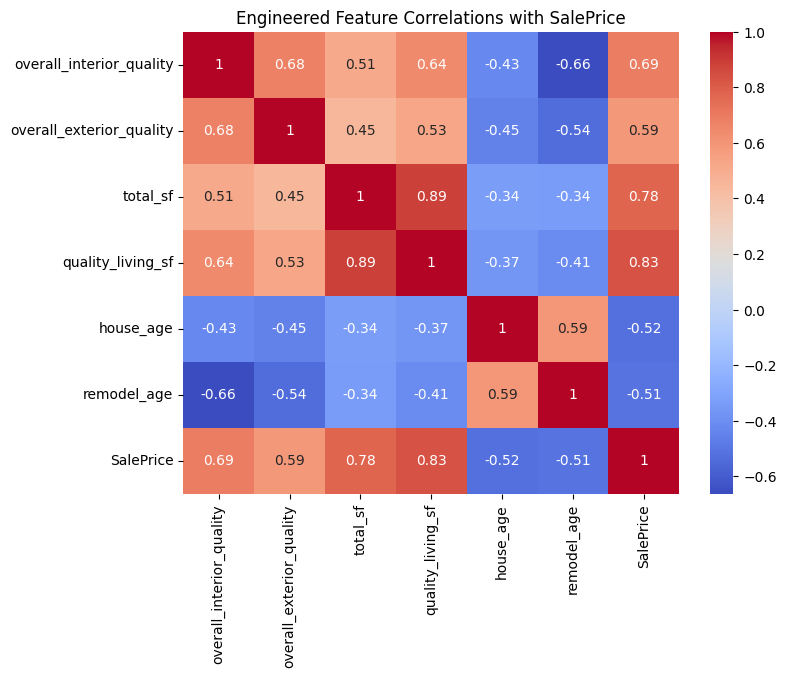

In [17]:
engineered = ["overall_interior_quality", "overall_exterior_quality", "total_sf",
              "quality_living_sf", "house_age", "remodel_age"]

plt.figure(figsize=(8,6))
sns.heatmap(train_df[engineered + ["SalePrice"]].corr(), annot=True, cmap="coolwarm")
plt.title("Engineered Feature Correlations with SalePrice")
plt.show()

In [18]:
#top features
train_df['quality_size'] = train_df['OverallQual'] * train_df['total_sf']
test_df['quality_size'] = test_df['OverallQual'] * test_df['total_sf']

/tmp/ipykernel_13/3111708359.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df['quality_size'] = train_df['OverallQual'] * train_df['total_sf']
/tmp/ipykernel_13/3111708359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df['quality_size'] = test_df['OverallQual'] * test_df['total_sf']


In [19]:
for df in [train_df, test_df]:
    df['luxury_features_count'] = df[['has_fireplace', 'PoolArea', 'GarageCars', 'MasVnrArea']].sum(axis=1)
    df['living_space_ratio'] = df['quality_living_sf'] / df['total_sf']
    df['garage_quality_score'] = (df['GarageCars'] * df['GarageArea'])
    df['overall_premium_index'] = (df['overall_interior_quality'] + df['overall_exterior_quality'] + df['garage_quality_score']) / 3

/tmp/ipykernel_13/1778890259.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['luxury_features_count'] = df[['has_fireplace', 'PoolArea', 'GarageCars', 'MasVnrArea']].sum(axis=1)
/tmp/ipykernel_13/1778890259.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['living_space_ratio'] = df['quality_living_sf'] / df['total_sf']
/tmp/ipykernel_13/1778890259.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

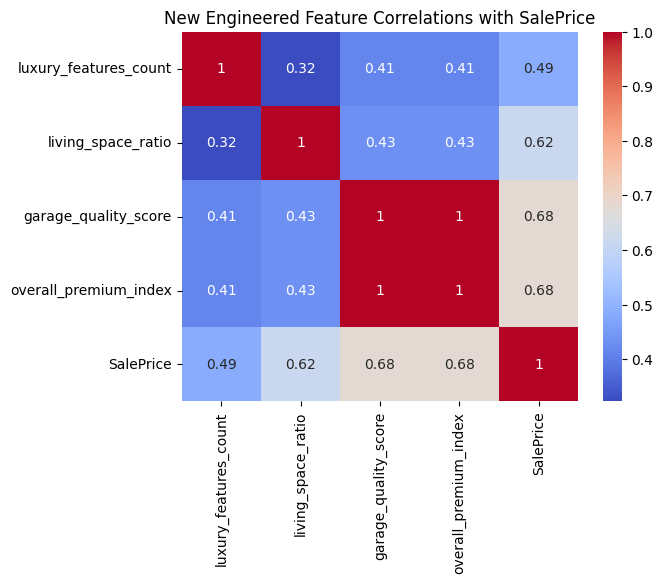

In [20]:
corr = train_df[['luxury_features_count', 'living_space_ratio', 
                 'garage_quality_score', 'overall_premium_index', 'SalePrice']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("New Engineered Feature Correlations with SalePrice")
plt.show() 

# splitting

In [21]:
#drop
for df in [train_df, test_df]:
    df.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley'], axis=1, inplace=True, errors='ignore')

X = train_df.drop(['SalePrice'], axis=1)
y = train_df['SalePrice']
y_binned = pd.qcut(y, q=10, duplicates='drop')

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_i, val_i in split.split(X, y_binned):
    X_train, X_val = X.iloc[train_i], X.iloc[val_i]
    y_train, y_val = y.iloc[train_i], y.iloc[val_i]

# Encoding

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [24]:
#Object columns
cat_object_cols = X_train.select_dtypes(include=['object']).columns.tolist()

#Numeric columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

#Numaric Catigorical
cat_numeric_cols = [col for col in num_cols if X_train[col].nunique() < 20]

#Final lists
numeric_cols = [col for col in num_cols if col not in cat_numeric_cols]
categorical_cols = cat_object_cols + cat_numeric_cols

#Convert cat columns to string
for col in categorical_cols:
    X_train[col] = X_train[col].astype(str)
    X_val[col] = X_val[col].astype(str)

#for test df to avoid error
for col in categorical_cols:
    if col in test_df.columns:
        test_df[col] = test_df[col].astype(str)

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)


#scale num, onehotencode cat

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='drop'
)

X_train_enc = preprocessor.fit_transform(X_train)
X_val_enc = preprocessor.transform(X_val)

Numeric columns: ['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'overall_interior_quality', 'overall_outdoor_quality', 'house_age', 'remodel_age', 'total_floor_sf', 'total_porch_sf', 'total_sf', 'quality_living_sf', 'quality_basement_sf', 'quality_garage_sf', 'neigh_mean_price', 'quality_size', 'luxury_features_count', 'living_space_ratio', 'garage_quality_score', 'overall_premium_index']
Categorical columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'FireplaceQu', 'Gara

/tmp/ipykernel_13/201456421.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].astype(str)
/tmp/ipykernel_13/201456421.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val[col] = X_val[col].astype(str)
/tmp/ipykernel_13/201456421.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [25]:
for col in numeric_cols:
    if not np.isfinite(X_train[col]).all():
        print(col, "has invalid values!")

# Model

In [26]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

RFR = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

GBR = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

RFR.fit(X_train_enc, y_train)
GBR.fit(X_train_enc, y_train)


RFR_predict = RFR.predict(X_val_enc)
GBR_predict = GBR.predict(X_val_enc)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Random Forest metrics
print("Random Forest Regressor:")
print("R²:", r2_score(y_val, RFR_predict))
print("MAE:", mean_absolute_error(y_val, RFR_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_val, RFR_predict)))

# Gradient Boosting metrics
print("\nGradient Boosting Regressor:")
print("R²:", r2_score(y_val, GBR_predict))
print("MAE:", mean_absolute_error(y_val, GBR_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_val, GBR_predict)))

Random Forest Regressor:
R²: 0.8902004068251393
MAE: 16778.58406392694
RMSE: 26531.296580778668

Gradient Boosting Regressor:
R²: 0.9205767282568923
MAE: 14319.389206184786
RMSE: 22564.82634314534


# submit

In [28]:
X_test_enc = preprocessor.transform(test_df)

In [29]:
test_predict = GBR.predict(X_test_enc)

In [30]:
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_predict
})

# Save to CSV
submission.to_csv('submission.csv', index=False)